In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

filename = '../inputs/Lacteos.csv'
df = pd.read_csv(filename)
df.head()


,Date,Account_id,Product_id,Category,Quantity
0,2022-01-03,34685910,34254,Lacteos,1
1,2022-01-03,33223287,34244,Lacteos,2
2,2022-01-03,38095128,34244,Lacteos,3
3,2022-01-03,38095128,34374,Lacteos,1
4,2022-01-03,33229395,34244,Lacteos,25


In [3]:
df = pd.get_dummies(data=df, drop_first=True)
df.head()

,Account_id,Product_id,Quantity,Date_2022-01-04,Date_2022-01-05,Date_2022-01-06,Date_2022-01-07,Date_2022-01-08,Date_2022-01-11,Date_2022-01-12,...,Date_2022-07-20,Date_2022-07-21,Date_2022-07-22,Date_2022-07-23,Date_2022-07-25,Date_2022-07-26,Date_2022-07-27,Date_2022-07-28,Date_2022-07-29,Date_2022-07-30
0,34685910,34254,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33223287,34244,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38095128,34244,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,38095128,34374,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33229395,34244,25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
col_exp = df.drop(columns='Quantity')
col_obj = df.Quantity

In [5]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X=col_exp, y=col_obj)

DecisionTreeClassifier(max_depth=5)

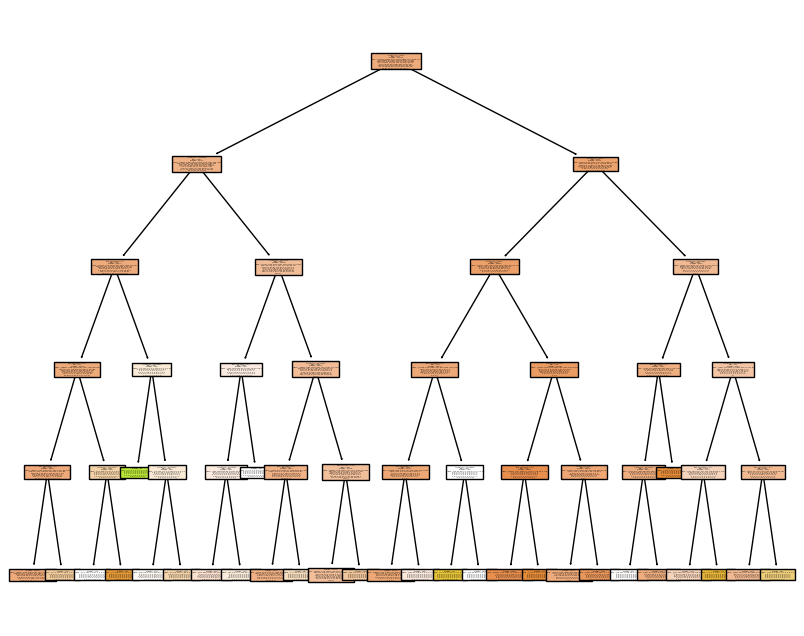

In [7]:
plt.figure(figsize=(10,8))
plot_tree(decision_tree=model, feature_names=col_exp.columns, filled=True);

In [6]:
a = col_exp.sample()
a

,Account_id,Product_id,Date_2022-01-04,Date_2022-01-05,Date_2022-01-06,Date_2022-01-07,Date_2022-01-08,Date_2022-01-11,Date_2022-01-12,Date_2022-01-13,...,Date_2022-07-20,Date_2022-07-21,Date_2022-07-22,Date_2022-07-23,Date_2022-07-25,Date_2022-07-26,Date_2022-07-27,Date_2022-07-28,Date_2022-07-29,Date_2022-07-30
1157995,33232587,34246,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
model.predict_proba(a)

array([[7.35182422e-01, 1.37659377e-01, 4.72987963e-02, 1.32286986e-02,
        2.99113882e-02, 6.96888363e-03, 7.74320403e-04, 3.87160202e-04,
        2.41431362e-03, 7.86935736e-03, 0.00000000e+00, 1.93580101e-03,
        0.00000000e+00, 0.00000000e+00, 2.56221751e-03, 0.00000000e+00,
        3.87160202e-04, 0.00000000e+00, 1.39203668e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.04890399e-03, 0.00000000e+00,
        0.00000000e+00, 3.87160202e-04, 1.89229986e-03, 0.00000000e+00,
        0.00000000e+00, 3.69759743e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.30991087e-03, 0.00000000e+00,
        3.87160202e-04, 0.00000000e+00, 0.00000000e+00, 3.87160202e-04,
        3.87160202e-04, 0.00000000e+00, 3.87160202e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.14843026e-03,
        3.87160202e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.87160202e-04, 1.16148061e-03, 0.00000000e+00, 3.871602

In [8]:
y_pred = model.predict(col_exp)

<AxesSubplot: xlabel='Account_id', ylabel='Count'>

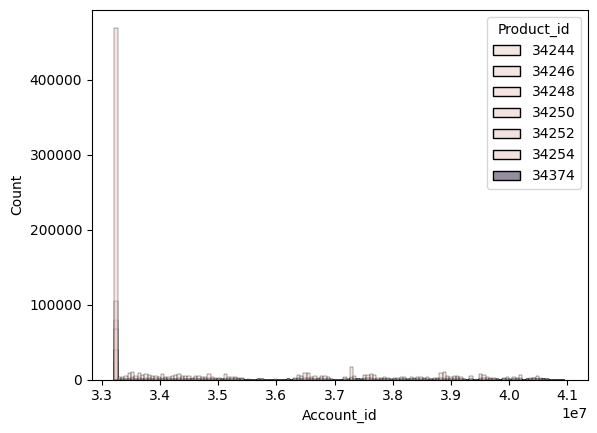

In [9]:
sns.histplot(x=df.Account_id, hue=df.Product_id)

In [10]:
df['pred'] = y_pred

In [11]:
df.sample(10)[['Account_id', 'Product_id', 'Quantity']]

,Account_id,Product_id,Quantity
46509,37666584,34254,2
532084,36791781,34246,10
1332796,33249204,34250,1
199026,34383063,34244,2
1143229,38177352,34244,1
50088,37693140,34244,1
503481,33262956,34244,2
945151,33229197,34252,5
1568633,33488556,34244,1
1297738,37929378,34244,2


In [12]:
df['Quantity'] == df['pred']

0           True
1          False
2          False
3           True
4          False
           ...  
1649259     True
1649260     True
1649261     True
1649262     True
1649263     True
Length: 1649264, dtype: bool

In [13]:
(df['Quantity'] == df['pred']).sum()

1174073

In [14]:
(df['Quantity'] == df['pred']).mean()

0.711876934196102